In [1]:
import os
import math
import re
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from regressors import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')


## 1. The LASSO and Boosting for Regression

## (a) Download the Communities and Crime data1 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

## (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [2]:
cols = []
fh = open('communities.names', 'r')
for f in fh:
    if f.startswith('@attribute'):
        
        cols.append(f.split()[1])

data = pd.read_csv('communities.data',header=None)
data.columns = cols

data = data.iloc[:,5:]
data = data.applymap(lambda x: np.nan if x == '?' else x)

data.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34        0.21  ...   
4         0.05         0.38         0.38         0.23        0.36  ...   

   LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0      0.12     0.26            0.20       0.06           0.04   
1      0.02     0.12            0.45        NaN            NaN   
2      0.01     0.21            0.02        NaN            NaN   
3      0.02     0.39            0.28        NaN            NaN   
4      0.04     0.09            0.02        NaN            NaN   

   LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                  0.9                  0.5                 0.32   
1                  NaN                  NaN                 0.00   
2                  NaN                  NaN                 0.00   
3                  NaN                  NaN                 0.00   
4                  NaN                  NaN                 0.00   

   PolicBudgPerPop  ViolentCrimesPerPop  
0             0.14                 0.20  
1              NaN                 0.67  
2              NaN                 0.43  
3              NaN                 0.12  
4              NaN                 0.03  

[5 rows x 123 columns]

In [3]:
train_df = data.iloc[:1495,:]
train_df = train_df.apply(pd.to_numeric, errors='ignore')
train_df = train_df.fillna(value = train_df.mean())
train_df.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34        0.21  ...   
4         0.05         0.38         0.38         0.23        0.36  ...   

   LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0      0.12     0.26            0.20   0.060000       0.040000   
1      0.02     0.12            0.45   0.163975       0.080502   
2      0.01     0.21            0.02   0.163975       0.080502   
3      0.02     0.39            0.28   0.163975       0.080502   
4      0.04     0.09            0.02   0.163975       0.080502   

   LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0             0.900000             0.500000                 0.32   
1             0.713054             0.451883                 0.00   
2             0.713054             0.451883                 0.00   
3             0.713054             0.451883                 0.00   
4             0.713054             0.451883                 0.00   

   PolicBudgPerPop  ViolentCrimesPerPop  
0         0.140000                 0.20  
1         0.190753                 0.67  
2         0.190753                 0.43  
3         0.190753                 0.12  
4         0.190753                 0.03  

[5 rows x 123 columns]

In [4]:
test_df = data.iloc[1495:, :]
test_df = test_df.apply(pd.to_numeric, errors='ignore')
test_df = test_df.fillna(value = test_df.mean())
test_df.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1495        0.00           0.20          0.03          0.91          0.23   
1496        0.00           0.55          0.13          0.78          0.15   
1497        0.00           0.52          0.04          0.59          0.05   
1498        0.04           0.51          0.07          0.92          0.09   
1499        0.03           0.59          0.20          0.75          0.19   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
1495         0.05         0.15         0.19         0.09        0.42  ...   
1496         0.36         0.48         0.53         0.30        0.10  ...   
1497         0.62         0.84         0.78         0.75        0.43  ...   
1498         0.03         0.38         0.47         0.27        0.35  ...   
1499         0.10         0.38         0.62         0.35        0.11  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
1495      0.01     0.23            0.73     0.1605       0.065375   
1496      0.01     0.18            0.02     0.1605       0.065375   
1497      0.01     0.18            0.00     0.1605       0.065375   
1498      0.06     0.13            0.16     0.1605       0.065375   
1499      0.03     0.23            0.06     0.1605       0.065375   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
1495             0.655375              0.40625                  0.0   
1496             0.655375              0.40625                  0.0   
1497             0.655375              0.40625                  0.0   
1498             0.655375              0.40625                  0.0   
1499             0.655375              0.40625                  0.0   

      PolicBudgPerPop  ViolentCrimesPerPop  
1495            0.208                 0.12  
1496            0.208                 0.11  
1497            0.208                 0.12  
1498            0.208                 0.06  
1499            0.208                 0.12  

[5 rows x 123 columns]

In [5]:
df = pd.concat([train_df, test_df])
df.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34        0.21  ...   
4         0.05         0.38         0.38         0.23        0.36  ...   

   LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0      0.12     0.26            0.20   0.060000       0.040000   
1      0.02     0.12            0.45   0.163975       0.080502   
2      0.01     0.21            0.02   0.163975       0.080502   
3      0.02     0.39            0.28   0.163975       0.080502   
4      0.04     0.09            0.02   0.163975       0.080502   

   LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0             0.900000             0.500000                 0.32   
1             0.713054             0.451883                 0.00   
2             0.713054             0.451883                 0.00   
3             0.713054             0.451883                 0.00   
4             0.713054             0.451883                 0.00   

   PolicBudgPerPop  ViolentCrimesPerPop  
0         0.140000                 0.20  
1         0.190753                 0.67  
2         0.190753                 0.43  
3         0.190753                 0.12  
4         0.190753                 0.03  

[5 rows x 123 columns]

## (c) Plot a correlation matrix for the features in the data set.

In [6]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='YlGnBu').set_precision(3)

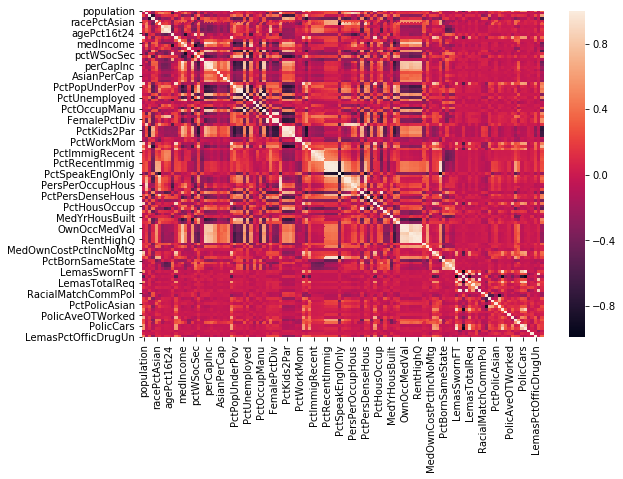

In [7]:
plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix)

In [8]:
mean_df = df.mean(axis=0).to_frame()
mean_df.columns = ['mean']
std_df = df.std(axis=0).to_frame()
std_df.columns = ['std']
coeff_df = pd.concat([std_df, mean_df], axis=1)
coeff_df['coeff_var'] = coeff_df['std'] / coeff_df['mean'] 
coeff_df

std      mean  coeff_var
population            0.126906  0.057593   2.203503
householdsize         0.163717  0.463395   0.353298
racepctblack          0.253442  0.179629   1.410920
racePctWhite          0.244039  0.753716   0.323782
racePctAsian          0.208877  0.153681   1.359162
racePctHisp           0.232492  0.144022   1.614278
agePct12t21           0.155196  0.424218   0.365840
agePct12t29           0.143564  0.493867   0.290693
agePct16t24           0.166505  0.336264   0.495161
agePct65up            0.179185  0.423164   0.423442
numbUrban             0.128256  0.064072   2.001744
pctUrban              0.444811  0.696269   0.638849
medIncome             0.209362  0.361123   0.579753
pctWWage              0.182913  0.558154   0.327710
pctWFarmSelf          0.204108  0.291570   0.700030
pctWInvInc            0.178071  0.495687   0.359240
pctWSocSec            0.173619  0.471133   0.368513
pctWPubAsst           0.222137  0.317778   0.699031
pctWRetire            0.167564  0.479248   0.349639
medFamInc             0.198257  0.375677   0.527732
perCapInc             0.191109  0.350251   0.545633
whitePerCap           0.186804  0.368049   0.507552
blackPerCap           0.171593  0.291098   0.589469
indianPerCap          0.164775  0.203506   0.809685
AsianPerCap           0.195411  0.322357   0.606194
OtherPerCap           0.190960  0.284740   0.670648
HispPerCap            0.183081  0.386279   0.473960
NumUnderPov           0.127941  0.055507   2.304970
PctPopUnderPov        0.228474  0.303024   0.753980
PctLess9thGrade       0.213360  0.315807   0.675600
...                        ...       ...        ...
PctSameHouse85        0.181352  0.535050   0.338944
PctSameCity85         0.200521  0.626424   0.320105
PctSameState85        0.198221  0.651530   0.304240
LemasSwornFT          0.055800  0.069666   0.800961
LemasSwFTPerPop       0.064016  0.217455   0.294387
LemasSwFTFieldOps     0.053547  0.924722   0.057906
LemasSwFTFieldPerPop  0.061955  0.246330   0.251513
LemasTotalReq         0.064824  0.098000   0.661478
LemasTotReqPerPop     0.065787  0.215201   0.305699
PolicReqPerOffic      0.078777  0.343638   0.229244
PolicPerPop           0.064024  0.217487   0.294384
RacialMatchCommPol    0.091295  0.689389   0.132428
PctPolicWhite         0.088480  0.726956   0.121712
PctPolicBlack         0.094643  0.220480   0.429257
PctPolicHisp          0.078397  0.134862   0.581315
PctPolicAsian         0.093182  0.114831   0.811473
PctPolicMinor         0.090341  0.259193   0.348546
OfficAssgnDrugUnits   0.048059  0.075552   0.636101
NumKindsDrugsSeiz     0.081406  0.556042   0.146402
PolicAveOTWorked      0.094820  0.306025   0.309845
LandArea              0.109459  0.065231   1.678031
PopDens               0.203092  0.232854   0.872187
PctUsePubTrans        0.229055  0.161685   1.416673
PolicCars             0.085804  0.163105   0.526063
PolicOperBudg         0.056326  0.076717   0.734216
LemasPctPolicOnPatr   0.088475  0.698620   0.126642
LemasGangUnitDeploy   0.163109  0.440463   0.370311
LemasPctOfficDrugUn   0.240328  0.094052   2.555266
PolicBudgPerPop       0.066152  0.195069   0.339119
ViolentCrimesPerPop   0.232985  0.237979   0.979015

[123 rows x 3 columns]

In [9]:
num_f = round(math.sqrt(128))

sorted_df = coeff_df.sort_values(by=['coeff_var'], ascending=False)

top_cv = sorted(list(sorted_df.iloc[:int(num_f),:].index))
print(top_cv)

top_cv_df = df.loc[:, top_cv]
top_cv_df.head()


['HousVacant', 'LandArea', 'LemasPctOfficDrugUn', 'NumIlleg', 'NumImmig', 'NumInShelters', 'NumStreet', 'NumUnderPov', 'numbUrban', 'population', 'racePctHisp']


HousVacant  LandArea  LemasPctOfficDrugUn  NumIlleg  NumImmig  \
0        0.21      0.12                 0.32      0.04      0.03   
1        0.02      0.02                 0.00      0.00      0.01   
2        0.01      0.01                 0.00      0.01      0.00   
3        0.01      0.02                 0.00      0.03      0.02   
4        0.01      0.04                 0.00      0.00      0.00   

   NumInShelters  NumStreet  NumUnderPov  numbUrban  population  racePctHisp  
0           0.04        0.0         0.08       0.20        0.19         0.17  
1           0.00        0.0         0.01       0.02        0.00         0.07  
2           0.00        0.0         0.01       0.00        0.00         0.04  
3           0.00        0.0         0.01       0.06        0.04         0.10  
4           0.00        0.0         0.00       0.02        0.01         0.05

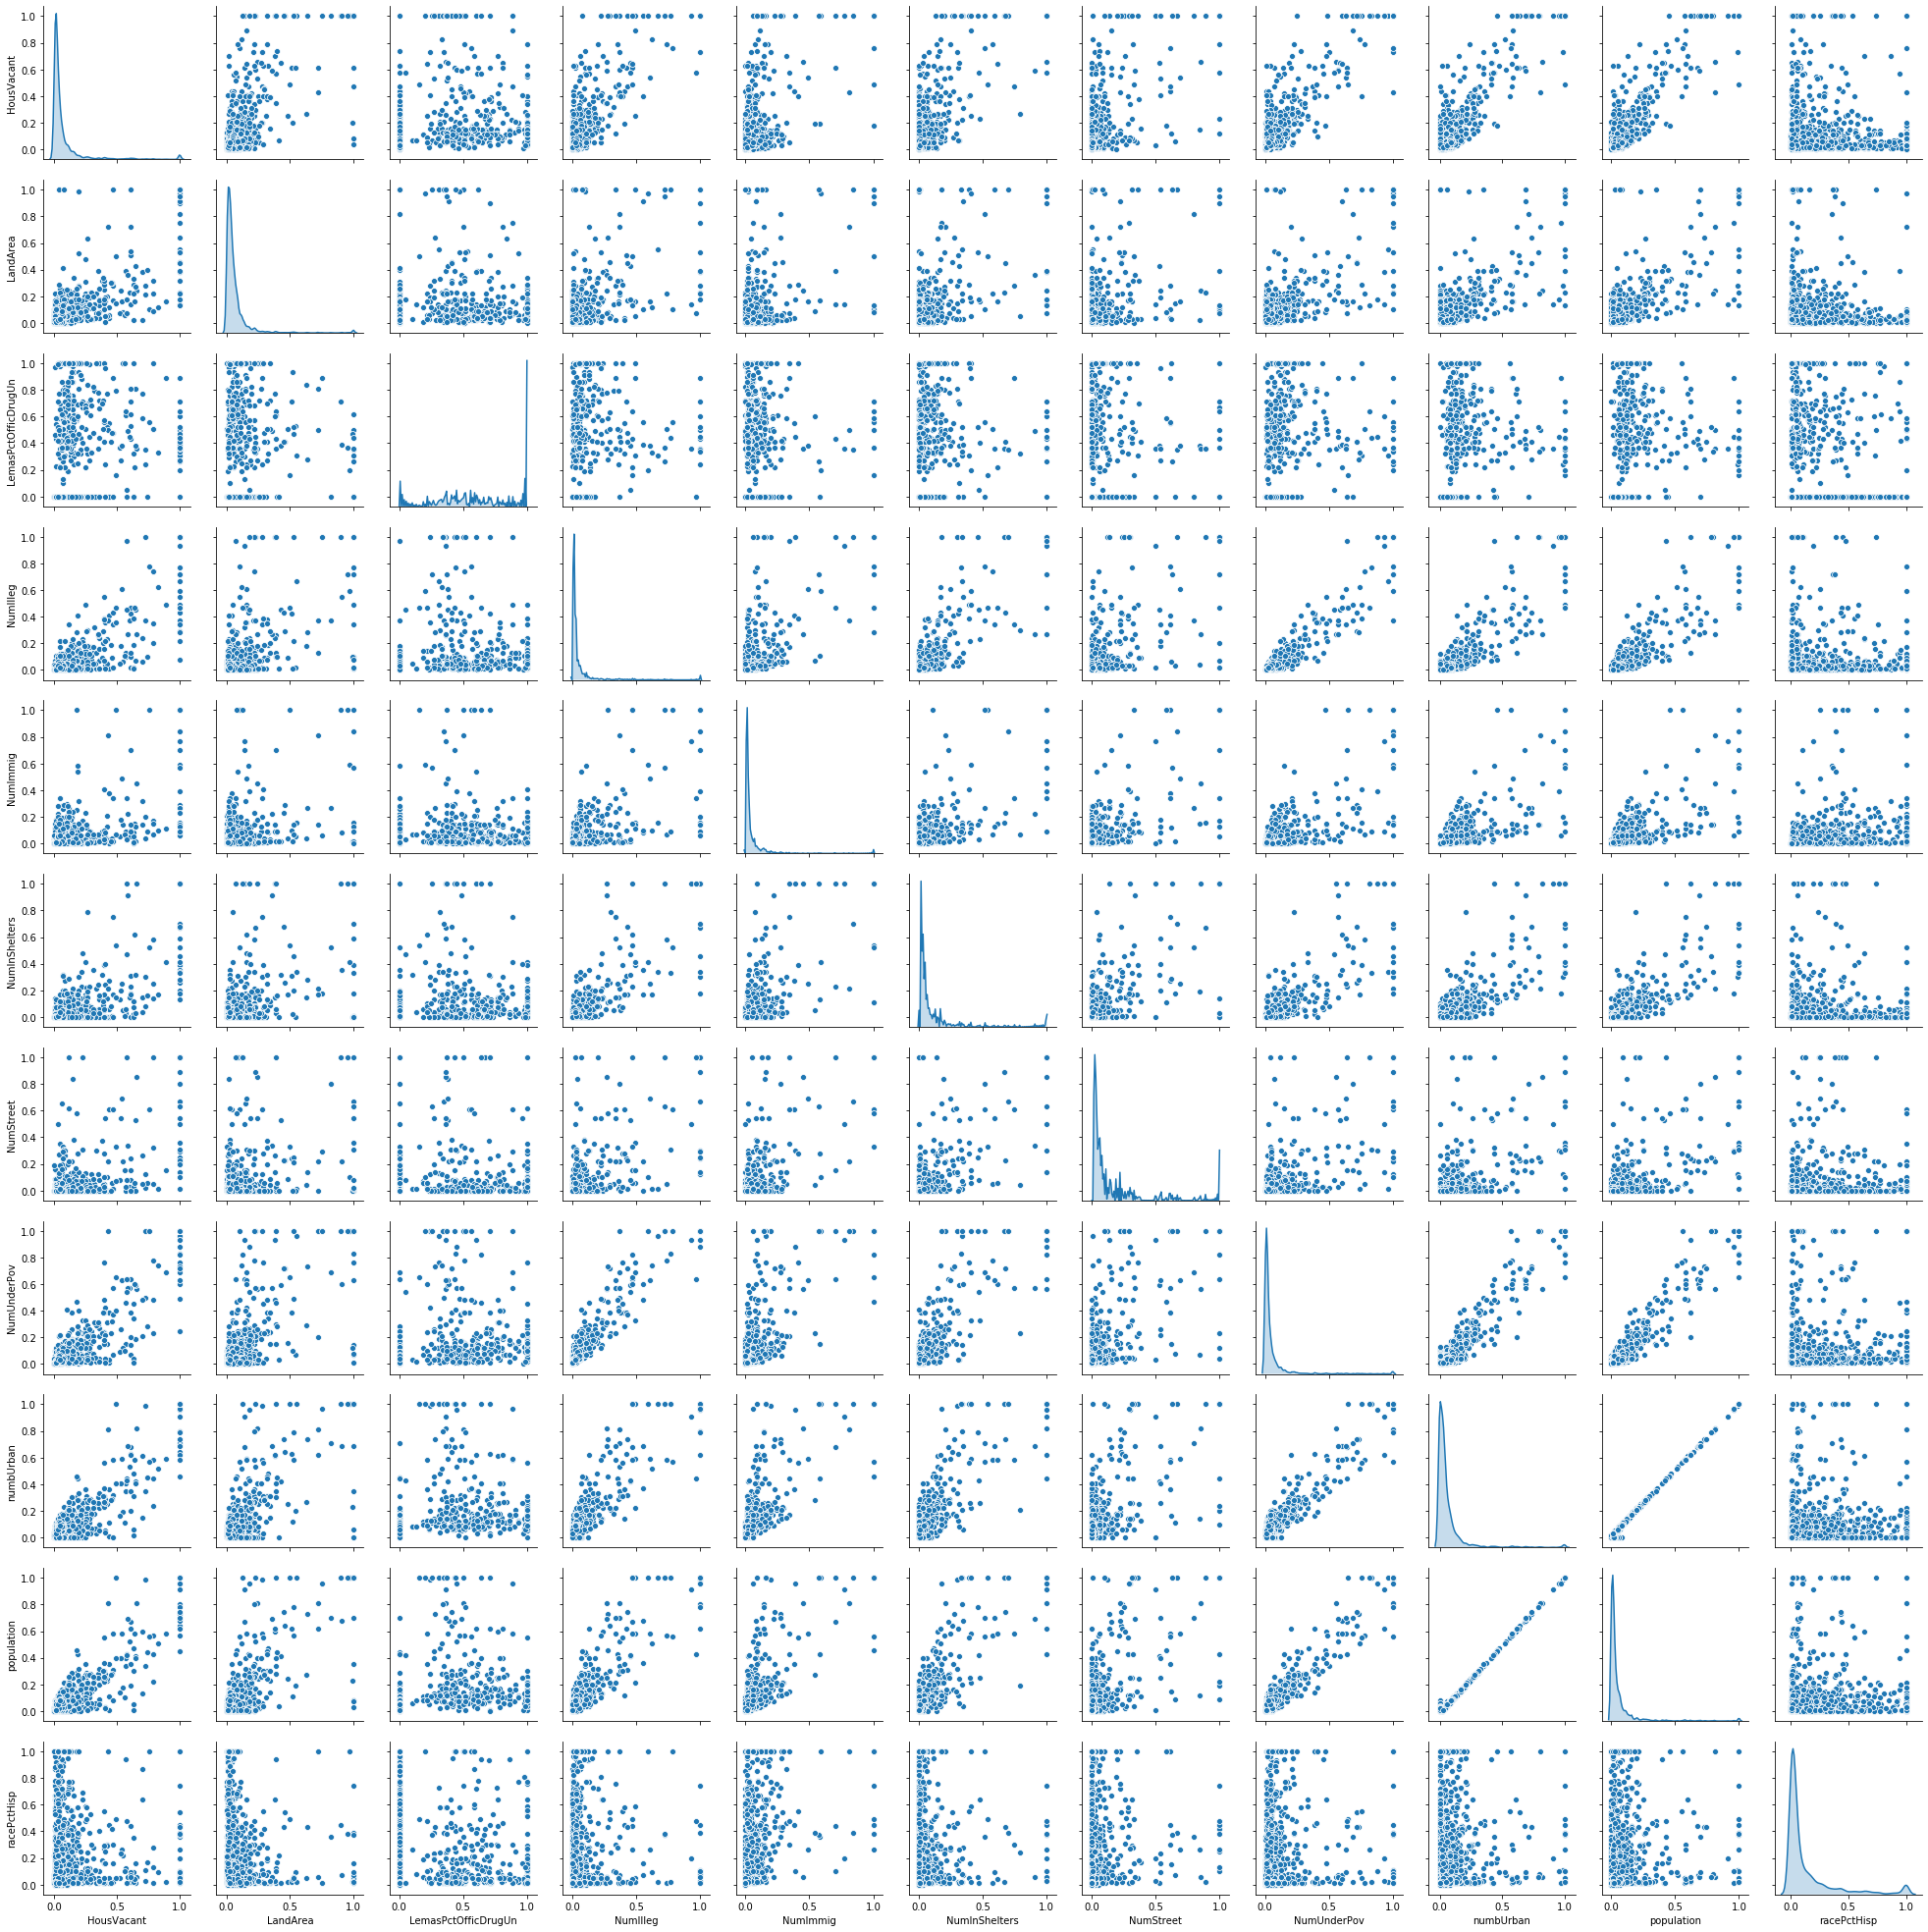

In [10]:
sns.pairplot(top_cv_df, diag_kind='kde')


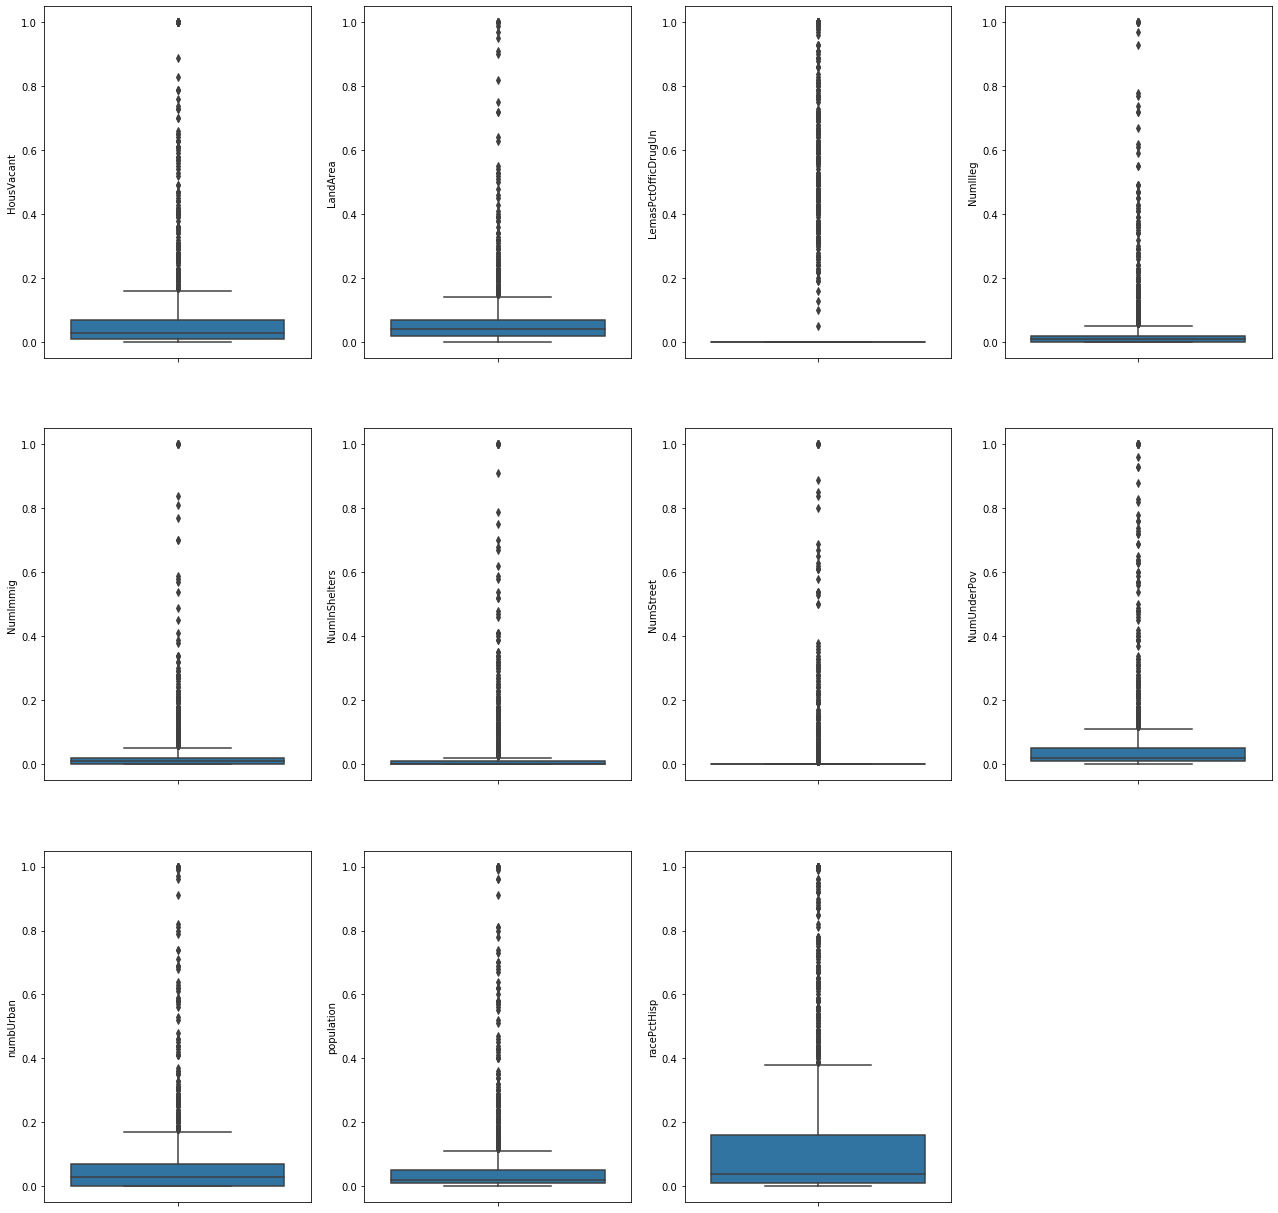

In [11]:
plt.figure(figsize=(22,22))
subplt = 1
for i in range(0,len(top_cv)):
    plt.subplot(3,4, subplt)
    sns.boxplot(y = top_cv[i], data=df)
    subplt += 1


## There may be collinearity between population and numbUrban based on the scatterplots. They demonstrate a strong positive correlation between each other, it could increase the standard errors of their coefficients. 

<font size =5>(f) Fit a linear model using least squares to the training set and report the test error.


In [12]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]

X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

lm2 = LinearRegression().fit(X_train, y_train)
y_pred2 = pd.DataFrame(lm2.predict(X_test))

test_MSE2 = round(metrics.mean_squared_error(y_test, y_pred2),3)
print('with <fit_intercept=True> MSE:', test_MSE2)

lm = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred = pd.DataFrame(lm.predict(X_test))

test_MSE = round(metrics.mean_squared_error(y_test, y_pred),3)
print('with <fit_intercept=False> MSE:', test_MSE)

with <fit_intercept=True> MSE: 3.6688514129802945e+19
with <fit_intercept=False> MSE: 0.018


<font size = 5>(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained




In [13]:
from sklearn.linear_model import  RidgeCV


reg = RidgeCV(cv=10, normalize=False)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
test_Mse = round(metrics.mean_squared_error(y_test, y_pred),6)
print('The test set MSE: %f , best λ  = %f.' %(test_Mse, reg.alpha_))

The test set MSE: 0.017724 , best λ  = 1.000000.


<font size = 5>(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized2 features. Report the test error for both cases and compare them.

In [14]:
from sklearn.linear_model import LassoCV

features_index=[]

lcv = LassoCV(cv=10, normalize=False) 
lcv.fit(X_train, y_train)
y_pred = lcv.predict(X_test)
test_Mse = metrics.mean_squared_error(y_test, y_pred)

for i in range(0,df.shape[1]-1):
    if lcv.coef_[i]!= 0:
        features_index.append(i)

print('The test set MSE: %f , best λ  = %f.' %(test_Mse, lcv.alpha_))
print('\nWith %d selected features:\n'%len(features_index))
print(', '.join(list(df.columns[features_index])))


The test set MSE: 0.017749 , best λ  = 0.000108.

With 77 selected features:

racepctblack, racePctAsian, agePct12t21, agePct12t29, agePct65up, pctUrban, pctWWage, pctWFarmSelf, pctWInvInc, pctWSocSec, pctWPubAsst, pctWRetire, whitePerCap, blackPerCap, indianPerCap, AsianPerCap, OtherPerCap, HispPerCap, PctPopUnderPov, PctLess9thGrade, PctBSorMore, PctEmploy, PctEmplManu, PctOccupManu, MalePctDivorce, MalePctNevMarr, FemalePctDiv, PctKids2Par, PctYoungKids2Par, PctTeen2Par, PctWorkMom, NumIlleg, PctIlleg, NumImmig, PctImmigRec10, PctRecImmig10, PctNotSpeakEnglWell, PctLargHouseOccup, PersPerOccupHous, PctPersOwnOccup, PctPersDenseHous, PctHousLess3BR, MedNumBR, HousVacant, PctHousOccup, PctVacantBoarded, PctVacMore6Mos, MedYrHousBuilt, PctHousNoPhone, PctWOFullPlumb, OwnOccLowQuart, RentLowQ, MedRent, MedRentPctHousInc, MedOwnCostPctInc, MedOwnCostPctIncNoMtg, NumInShelters, NumStreet, PctForeignBorn, PctBornSameState, PctSameCity85, LemasSwFTFieldPerPop, LemasTotalReq, PolicReqPerOffi

In [15]:
# standarize features
scaler = preprocessing.StandardScaler()
s_X_train = scaler.fit_transform(X_train)
s_X_test = scaler.fit_transform(X_test)
# fit
s_features_index=[]

lcv = LassoCV(cv=10, normalize=False, max_iter=50000) 
lcv.fit(s_X_train, y_train)
y_pred = lcv.predict(s_X_test)
test_Mse = metrics.mean_squared_error(y_test, y_pred)

for i in range(0,df.shape[1]-1):
    if lcv.coef_[i]!= 0:
        s_features_index.append(i)

print('The test set MSE with Standarized features : %f , best λ  = %f.' %(test_Mse, lcv.alpha_))
print('\nWith %d selected features:\n'%len(s_features_index))
print(', '.join(list(df.columns[s_features_index])))


The test set MSE with Standarized features : 0.018033 , best λ  = 0.000664.

With 76 selected features:

population, racepctblack, racePctAsian, agePct12t21, agePct12t29, pctUrban, pctWWage, pctWFarmSelf, pctWInvInc, pctWSocSec, pctWPubAsst, pctWRetire, whitePerCap, blackPerCap, indianPerCap, AsianPerCap, OtherPerCap, HispPerCap, PctPopUnderPov, PctLess9thGrade, PctEmploy, PctEmplManu, PctOccupManu, MalePctDivorce, MalePctNevMarr, FemalePctDiv, PctKids2Par, PctYoungKids2Par, PctTeen2Par, PctWorkMom, NumIlleg, PctIlleg, NumImmig, PctImmigRec10, PctRecImmig10, PctNotSpeakEnglWell, PctLargHouseOccup, PersPerOccupHous, PctPersOwnOccup, PctPersDenseHous, PctHousLess3BR, MedNumBR, HousVacant, PctHousOccup, PctVacantBoarded, PctVacMore6Mos, MedYrHousBuilt, PctHousNoPhone, PctWOFullPlumb, OwnOccLowQuart, RentLowQ, MedRent, MedRentPctHousInc, MedOwnCostPctInc, MedOwnCostPctIncNoMtg, NumInShelters, NumStreet, PctForeignBorn, PctSameCity85, LemasSwFTFieldPerPop, LemasTotalReq, PolicReqPerOffic, R

## Test error for standarized features is 0.018033 which is less than other one which is 0.017749, the difference is very little.

<font size = 5> (i) Fit a PCR model on the training set, with M (the number of principal compo- nents) chosen by cross-validation. Report the test error obtained.

In [19]:
from sklearn.decomposition import PCA
from sklearn import model_selection

cv_test_scores = []
num_of_p = list(range(1, X_train.shape[1] + 1))

for i in num_of_p:
    pca = PCA(n_components = i)
    principal_components = pca.fit_transform(X_train)
    lm = LinearRegression()
    score = model_selection.cross_validate(lm, principal_components, y_train.values.ravel(), cv=10,scoring = 'neg_mean_squared_error')
    cv_test_scores.append((score['test_score'] * -1).mean())
index = cv_test_scores.index(min(cv_test_scores))
M = num_of_p[index]
print('The best number of principal components is %d, cross validation score is %f.' %(M, min(cv_test_scores)))

The best number of principal components is 96, cross validation score is 0.019283.


In [20]:
pca = PCA(n_components = 96)
pc = pca.fit_transform(X_train, y_train)

lm = LinearRegression()
lm.fit(X_train.iloc[:,:96], y_train)
y_pred = lm.predict(X_test.iloc[:,:96])

test_score = metrics.mean_squared_error(y_test, y_pred)
print('Test score for PCR:', test_score)

Test score for PCR: 0.01768362631665895


<font size = 5>(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost3 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [21]:
from xgboost import XGBRegressor

alpha_list = np.linspace(np.float_power(10, -2), np.float_power(10, 1), 20)
score_list = []

for a in alpha_list:
    xgb = XGBRegressor()
    score = model_selection.cross_validate(xgb, X_train, y_train.values.ravel(), cv=10,  scoring='neg_mean_squared_error')
    score_list.append((score['test_score']* -1).mean())
a = alpha_list[np.argmin(score_list)]


[22:45:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[22:46:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:46:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:46:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:46:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:46:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:46:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:46:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:46:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:46:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[22:47:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [22]:
print('The α is', a)

The α is 0.01


In [23]:
xgb = XGBRegressor(reg_alpha = a)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mse_xgb = metrics.mean_squared_error(y_test, y_pred)

print('MSE when α = 0.01 : ', mse_xgb)

[22:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE when α = 0.01 :  0.016394018525757045


<font size =5>2. Tree-Based Methods
(a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test
set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are nu- meric.

In [24]:
train_df = pd.read_csv('aps_failure_training_set.csv', header=14)
test_df = pd.read_csv('aps_failure_test_set.csv', header=14)
train_df.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

In [25]:
test_df.head()

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  ...  \
0   neg      60      0     20     12      0      0      0      0      0  ...   
1   neg      82      0     68     40      0      0      0      0      0  ...   
2   neg   66002      2    212    112      0      0      0      0      0  ...   
3   neg   59816     na   1010    936      0      0      0      0      0  ...   
4   neg    1814     na    156    140      0      0      0      0      0  ...   

   ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 ee_009 ef_000  \
0    1098     138     412     654       78      88       0      0      0   
1    1068     276    1620     116       86     462       0      0      0   
2  495076  380368  440134  269556  1315022  153680     516      0      0   
3  540820  243270  483302  485332   431376  210074  281662   3232      0   
4    7646    4144   18466   49782     3176     482      76      0      0   

  eg_000  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 171 columns]

<font size =5>(b) Data Preparation
This data set has missing values. When the number of data with missing values
is significant, discarding them is not a good idea. 4
i. Research what types of techniques are usually used for dealing with data with missing values.5 Pick at least one of them and apply it to this data in the next steps.6

## Before dealing with the problem, we have to understand the reason why data goes missing. 
## 1.Missing at Random (MAR): Missing at random means that the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data 

## 2.Missing Completely at Random (MCAR): The fact that a certain value is missing has nothing to do with its hypothetical value and with the values of other variables.

## 3.Missing not at Random (MNAR): Two possible reasons are that the missing value depends on the hypothetical value (e.g. People with high salaries generally do not want to reveal their incomes in surveys) or missing value is dependent on some other variable’s value (e.g. Let’s assume that females generally don’t want to reveal their ages! Here the missing value in age variable is impacted by gender variable)

##  It is safe to remove the data with missing values for first two type, while in the third case removing observations with missing values can produce a bias in the model. So we have to be really careful before removing observations. Note that imputation does not necessarily give better results. A basic imputation method is computing overall mean, median, or mode. This is a fast and simple method, but mean imputation reduces variance in the dataset. We could also train a classifier using observations without missing values in order to predict the missing values. For example, a linear regression could be used to predict continuous values and KNN could be used to predict categorical or continuous values.

info from: https://measuringu.com/handle-missing-data/ and  https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

In [26]:
train_df = train_df.applymap( lambda x: np.nan if x == 'na' else x)
train_df = train_df.apply( pd.to_numeric, errors='ignore')
train_df = train_df.fillna( value = train_df.mean(), axis = 0)

test_df = test_df.applymap( lambda t: np.nan if t == 'na' else t)
test_df = test_df.apply( pd.to_numeric, errors='ignore')
test_df = test_df.fillna( value = test_df.mean(), axis = 0)

train_df.head()

class  aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0   neg   76698  0.713189  2.130706e+09     280.000000     0.0     0.0   
1   neg   33058  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2   neg   41040  0.713189  2.280000e+02     100.000000     0.0     0.0   
3   neg      12  0.000000  7.000000e+01      66.000000     0.0    10.0   
4   neg   60874  0.713189  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [27]:
test_df.head()

class  aa_000    ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg      60  0.000000    20.0    12.0     0.0     0.0     0.0     0.0   
1   neg      82  0.000000    68.0    40.0     0.0     0.0     0.0     0.0   
2   neg   66002  2.000000   212.0   112.0     0.0     0.0     0.0     0.0   
3   neg   59816  0.772065  1010.0   936.0     0.0     0.0     0.0     0.0   
4   neg    1814  0.772065   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

<font size = 5 >ii. For each of the 170 features, calculate the coefficient of variation CV = s / m
  where s is sample standard deviation and m is sample mean.

In [28]:
aps_data = pd.concat([train_df, test_df])
aps_data.head()

class  aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0   neg   76698  0.713189  2.130706e+09     280.000000     0.0     0.0   
1   neg   33058  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2   neg   41040  0.713189  2.280000e+02     100.000000     0.0     0.0   
3   neg      12  0.000000  7.000000e+01      66.000000     0.0    10.0   
4   neg   60874  0.713189  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [29]:
mean_df = aps_data.mean(axis=0).to_frame()
mean_df.columns = ['mean']
std_df = aps_data.std(axis=0).to_frame()
std_df.columns = ['std']
coeff_df = pd.concat([std_df, mean_df], axis=1)
coeff_df['coeff_var'] = coeff_df['std'] / coeff_df['mean'] 
coeff_df

std          mean   coeff_var
aa_000  2.647366e+05  6.115976e+04    4.328608
ab_000  1.580609e+00  7.255835e-01    2.178397
ac_000  7.726379e+08  3.564406e+08    2.167648
ad_000  3.113848e+07  1.505825e+05  206.786809
ae_000  1.501916e+02  6.736860e+00   22.293998
af_000  1.973186e+02  1.083611e+01   18.209361
ag_000  1.833152e+04  2.004200e+02   91.465520
ag_001  5.070160e+04  1.204876e+03   42.080340
ag_002  1.709244e+05  9.697877e+03   17.624927
ag_003  8.197386e+05  9.365156e+04    8.753069
ag_004  2.454729e+06  4.483483e+05    5.475050
ag_005  3.327567e+06  1.122580e+06    2.964212
ag_006  3.920051e+06  1.666276e+06    2.352582
ag_007  1.408486e+06  5.007962e+05    2.812494
ag_008  2.236647e+05  3.564393e+04    6.274974
ag_009  1.690622e+05  5.255826e+03   32.166624
ah_000  4.243513e+06  1.832626e+06    2.315537
ai_000  1.776093e+05  9.597092e+03   18.506576
aj_000  5.035822e+04  1.167194e+03   43.144685
ak_000  7.618109e+04  9.689278e+02   78.624114
al_000  5.613525e+05  6.160561e+04    9.112035
am_0    8.817370e+05  9.724376e+04    9.067286
an_000  7.896734e+06  3.503072e+06    2.254231
ao_000  6.918467e+06  3.039603e+06    2.276109
ap_000  3.145634e+06  1.019360e+06    3.085891
aq_000  1.281763e+06  4.491956e+05    2.853462
ar_000  5.209318e+00  4.928692e-01   10.569373
as_000  2.816705e+04  2.473052e+02  113.895899
at_000  1.204967e+05  5.196694e+03   23.187192
au_000  2.582010e+04  2.999186e+02   86.090347
...              ...           ...         ...
dl_000  1.081450e+06  2.887248e+04   37.456075
dm_000  2.709375e+05  7.841380e+03   34.552278
dn_000  9.846796e+04  3.424816e+04    2.875132
do_000  6.264474e+04  2.880994e+04    2.174414
dp_000  1.412507e+04  7.029805e+03    2.009312
dq_000  9.226557e+07  4.354978e+06   21.186232
dr_000  1.337730e+06  2.031169e+05    6.586012
ds_000  2.071219e+05  9.044804e+04    2.289954
dt_000  3.361925e+04  1.552795e+04    2.165080
du_000  1.152270e+07  4.120959e+06    2.796120
dv_000  2.086551e+06  6.044267e+05    3.452116
dx_000  4.030501e+06  7.894674e+05    5.105342
dy_000  5.893561e+04  7.840514e+03    7.516804
dz_000  1.016014e+01  2.062846e-01   49.253005
ea_000  5.032915e+01  1.535429e+00   32.778551
eb_000  4.507990e+07  9.925158e+06    4.541983
ec_00   3.230633e+03  1.358236e+03    2.378550
ed_000  3.296109e+03  1.464589e+03    2.250536
ee_000  2.508392e+06  7.445107e+05    3.369182
ee_001  2.550369e+06  7.883138e+05    3.235221
ee_002  1.170523e+06  4.495789e+05    2.603598
ee_003  5.487443e+05  2.132474e+05    2.573276
ee_004  1.183134e+06  4.506510e+05    2.625389
ee_005  1.145079e+06  4.006248e+05    2.858232
ee_006  1.091658e+06  3.378721e+05    3.230981
ee_007  1.697870e+06  3.475620e+05    4.885086
ee_008  4.665610e+05  1.398975e+05    3.335019
ee_009  4.847679e+04  8.425007e+03    5.753917
ef_000  4.082618e+00  8.518742e-02   47.925135
eg_000  9.999582e+00  2.190560e-01   45.648516

[170 rows x 3 columns]

<font size= 5> iii. Plot a correlation matrix for your features using pandas or any other tool.

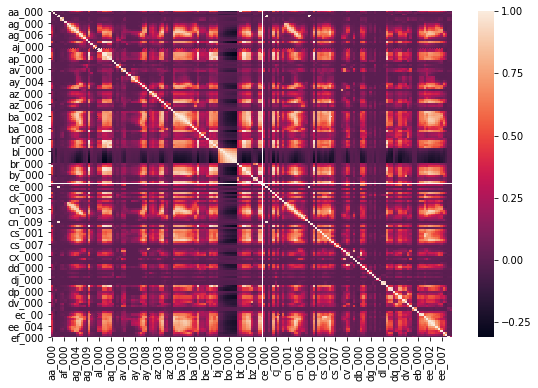

In [30]:
corr_matrix = aps_data.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix)

<font size= 5>(iv) Pick top 170^1/2 features with highest CV , and make scatter plots and box plots for them

In [31]:
num_f = round(math.sqrt(170))

sorted_df = coeff_df.sort_values(by=['coeff_var'], ascending=False)

top_cv = list(sorted_df.iloc[:int(num_f),:].index)
print(top_cv)

top_cv_df = aps_data.loc[:, top_cv]
print('\n Num of Predictors: %d'%top_cv_df.shape[1] )
top_cv_df.head()


['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'as_000', 'dh_000', 'df_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009']

 Num of Predictors: 13


cf_000         co_000         ad_000  cs_009  dj_000  as_000  \
0       2.000000     220.000000     280.000000     0.0     0.0     0.0   
1  190221.810984  190515.566938  190620.639314     0.0     0.0     0.0   
2       0.000000       0.000000     100.000000     0.0     0.0     0.0   
3       2.000000       2.000000      66.000000     0.0     0.0     0.0   
4       0.000000     202.000000     458.000000     0.0     0.0     0.0   

   dh_000  df_000  ag_000  au_000  ak_000  az_009  ay_009  
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0

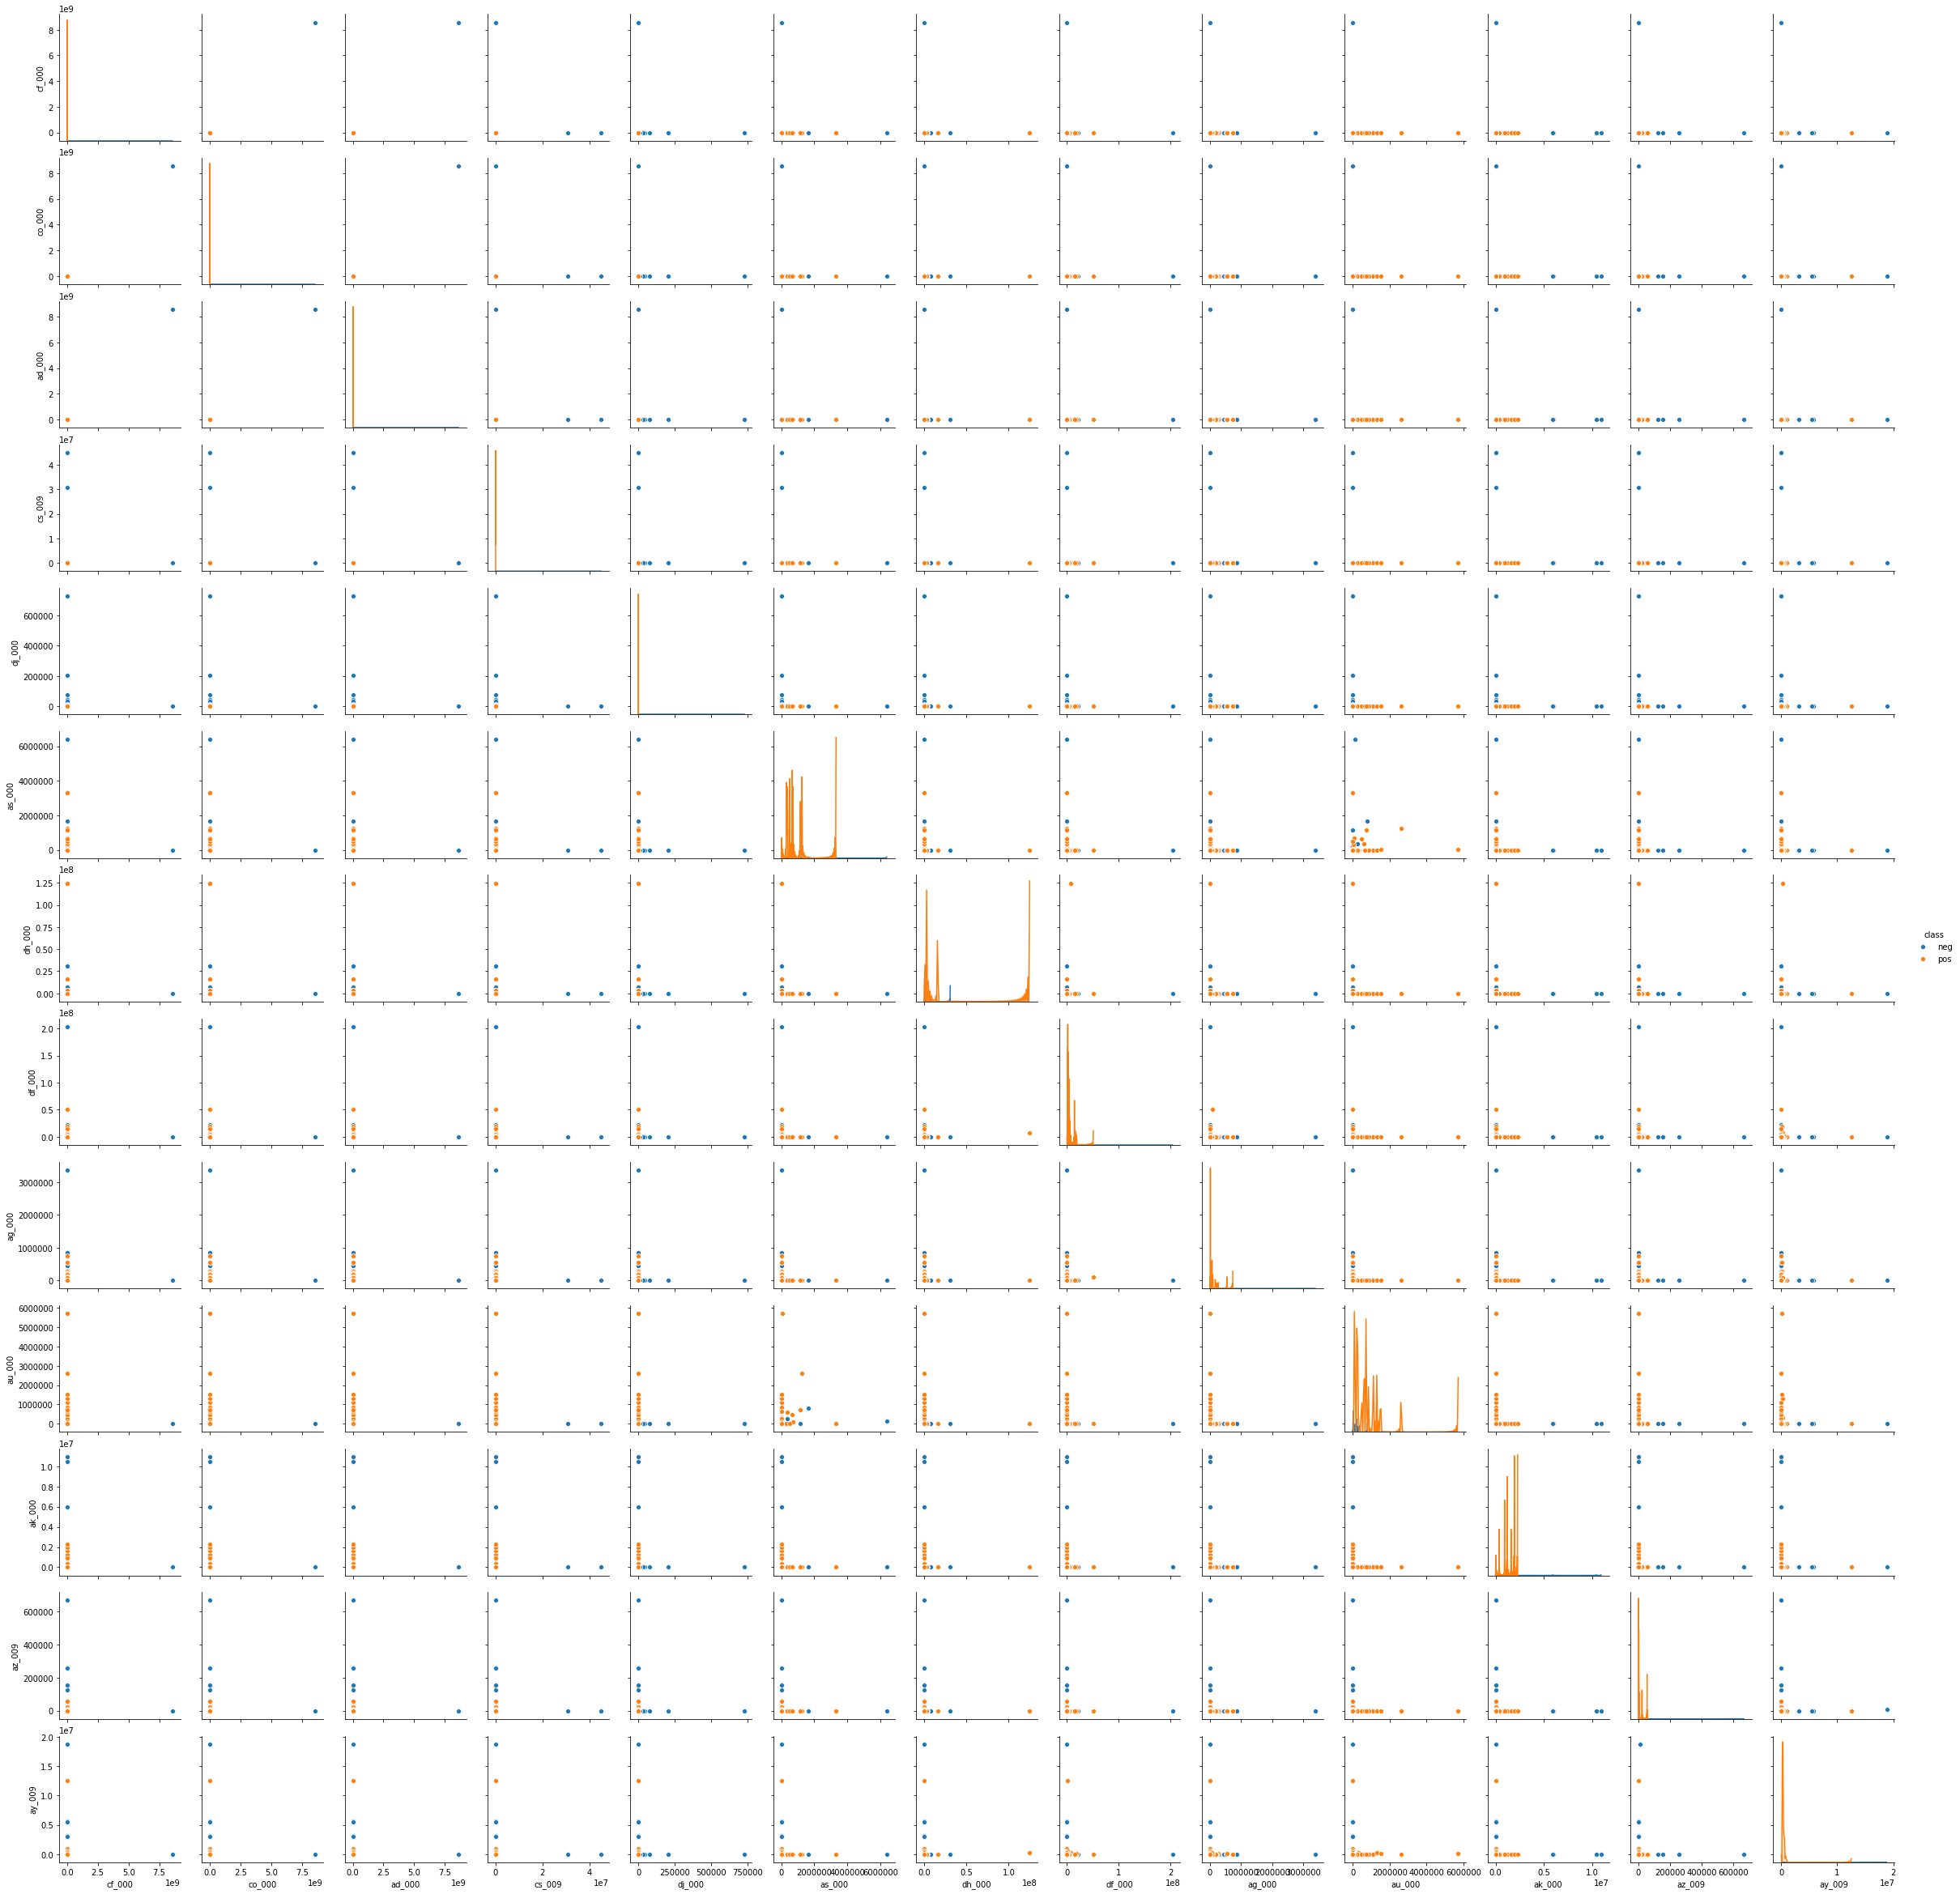

In [32]:
pair_df = top_cv_df
pair_df['class'] = aps_data['class']
sns.pairplot(pair_df, hue = 'class', diag_kind='kde')

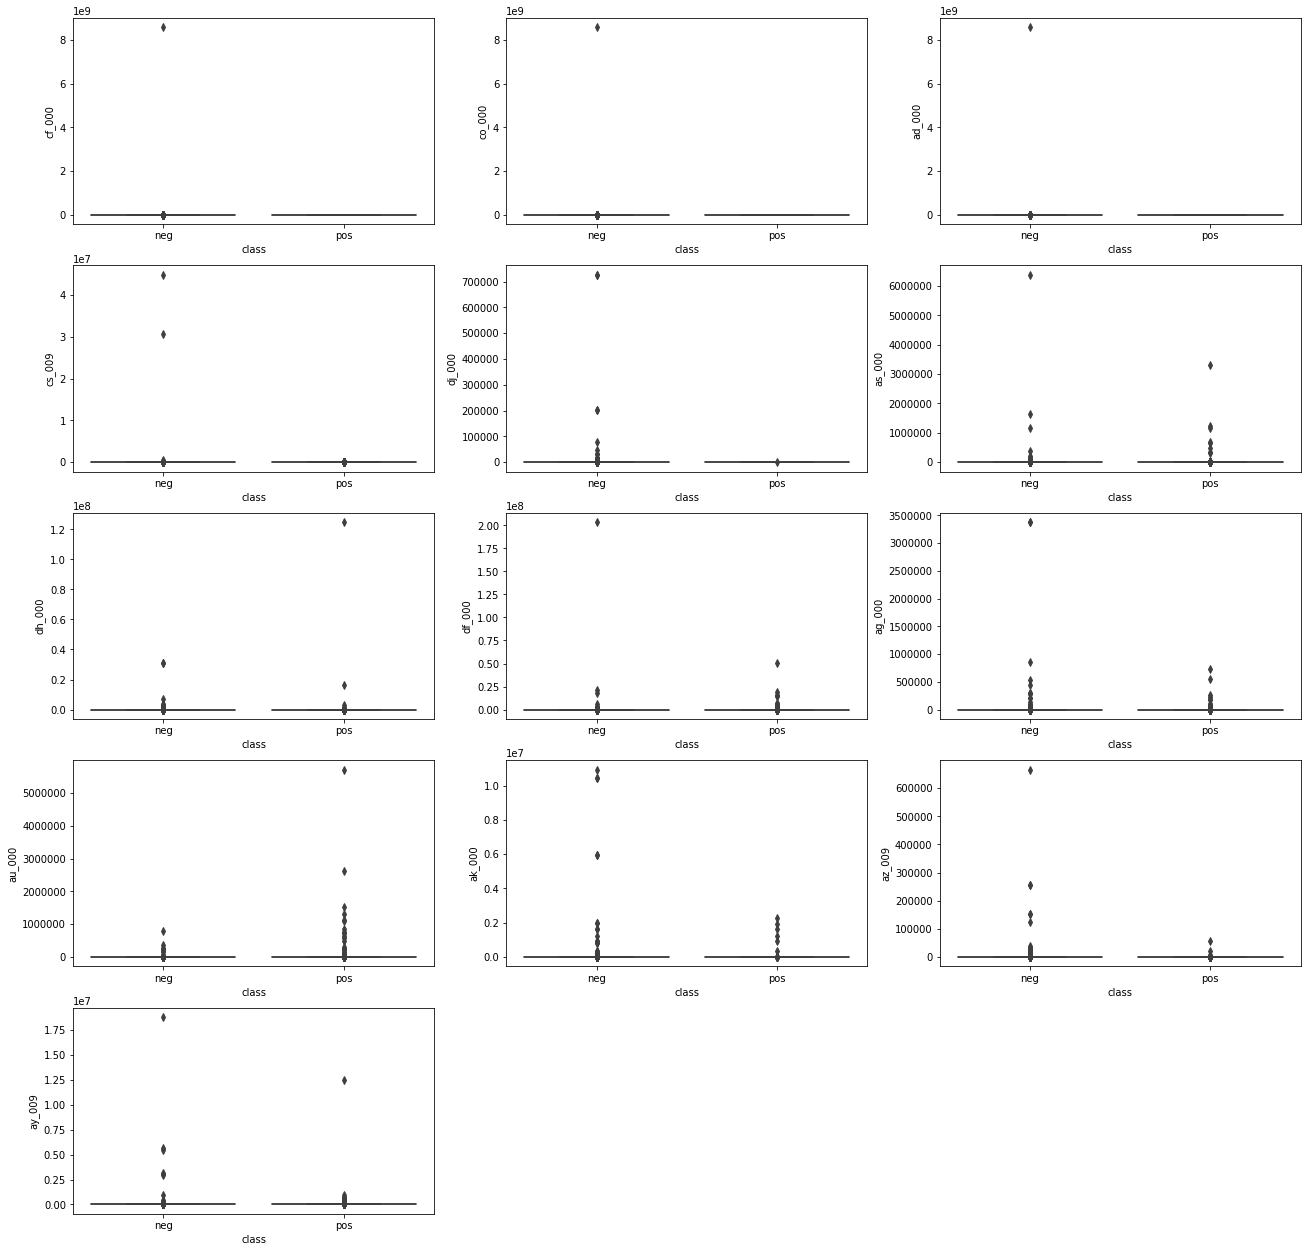

In [33]:
plt.figure(figsize=(22,22))
subplt = 1

for i in range(0,len(top_cv)):
    plt.subplot(5,3, subplt)
    sns.boxplot(x = 'class', y = top_cv[i], data=aps_data)
    subplt += 1

## I think there are no predictor that have positive correlations base on the scatterplots.

<font size = 5> (v) Determine the number of positive and negative data, Is this data set imbalanced?

In [34]:
num_negatives = aps_data[aps_data['class'] == 'neg'].shape[0]
num_positives = aps_data[aps_data['class'] == 'pos'].shape[0]

print('number of negatives:',num_negatives)
print('number of num_positives:',num_positives)

number of negatives: 74625
number of num_positives: 1375


## Number of negative data  vs positive data : 74625  vs  1375  . The data is imbalanced, only 1.8% of the datapoints are in positive class and 98.2% of the datapoints are in negative class.

<font size = 5 >(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [35]:
from sklearn.ensemble import RandomForestClassifier

train_df['class'] = train_df['class'].apply( lambda x: 1 if x == 'pos' else 0)
test_df['class'] = test_df['class'].apply(lambda x: 1 if x == 'pos' else 0)

train_df['class'].head()
X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]


X_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

In [36]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True)   
rfc.fit(X_train, y_train) 

y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)


0.0
[[59000     0]
 [    0  1000]]
Confusion matrix for training data: 


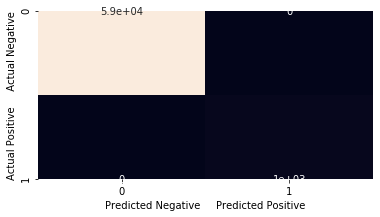

In [37]:
print(metrics.mean_squared_error(y_train, y_train_predict))
mat = confusion_matrix(y_train,y_train_predict)
print(mat)

sns.heatmap(mat,square= True, annot=True, cbar= False)
plt.xlabel("Predicted Negative     Predicted Positive")
plt.ylabel("Actual Positive     Actual Negative")
print('Confusion matrix for training data: ')

In [38]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict)
roc_auc = auc(fpr,tpr)

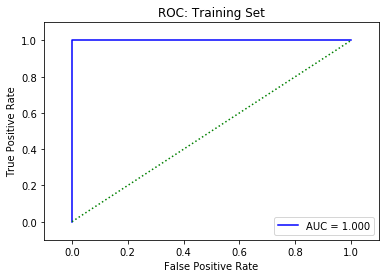

Misclassification rate for training set 0.0


In [39]:
from sklearn.metrics import accuracy_score
plt.plot(fpr, tpr, color='blue', label='AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='green',  linestyle=':')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Training Set')
plt.show()
mis_classification_rate_train = 1 - accuracy_score(y_train, y_train_predict.round())
print('Misclassification rate for training set',round(mis_classification_rate_train,5))

[[15604    21]
 [  106   269]]
Confusion matrix for testing data: 


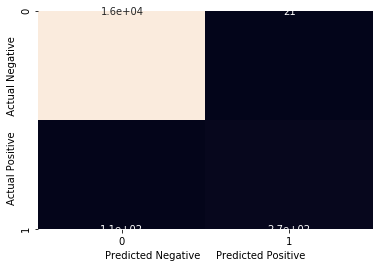

In [40]:
mat2 = confusion_matrix(y_test,y_test_predict.round())
print(mat2)

sns.heatmap(mat2, annot=True, cbar= False)
plt.xlabel("Predicted Negative     Predicted Positive")
plt.ylabel("Actual Positive     Actual Negative")
print('Confusion matrix for testing data: ')

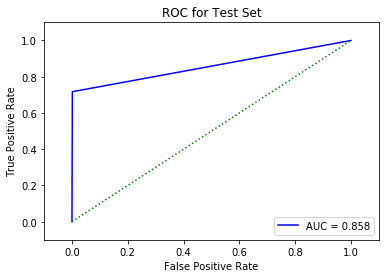

Misclassification rate for test set:  0.00794


In [41]:
from sklearn.metrics import accuracy_score
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
roc_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, color='blue', label='AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='green',  linestyle=':')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Test Set')
plt.show()

mis_class_rate_test = 1 - accuracy_score(y_test, y_test_predict)
print('Misclassification rate for test set: ', round(mis_class_rate_test,5))

In [42]:
oob_err = 1- rfc.oob_score_
test_err = 1 - rfc.score(X_test, y_test)
print('OOB error for random forest:', round(oob_err,5), 'test error: ', round(test_err,5),', Test error is a little higher than OOB error.')

OOB error for random forest: 0.00603 test error:  0.00794 , Test error is a little higher than OOB error.


<font sieze =5> (d) Compensate for class imbalance in your random forest and repeat 2c.

In [43]:
rfc_b = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, class_weight='balanced')  
rfc_b.fit(X_train, y_train) 

y_train_predict_b = rfc_b.predict(X_train)
y_test_predict_b = rfc_b.predict(X_test)


0.0
[[59000     0]
 [    0  1000]]
Confusion matrix for balanced training data: 


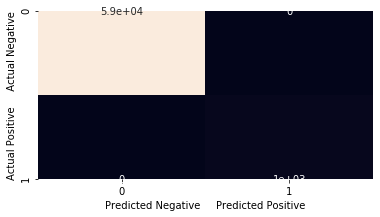

In [44]:
print(metrics.mean_squared_error(y_train, y_train_predict_b))
mat3 = confusion_matrix(y_train,y_train_predict_b)
print(mat3)

sns.heatmap(mat3,square= True, annot=True, cbar= False)
plt.xlabel("Predicted Negative     Predicted Positive")
plt.ylabel("Actual Positive     Actual Negative")
print('Confusion matrix for balanced training data: ')

In [45]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_b)
roc_auc = auc(fpr,tpr)

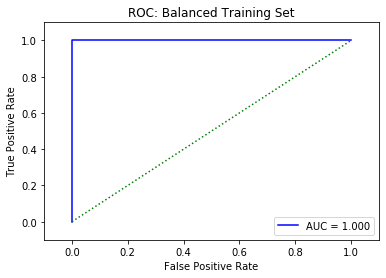

Misclassification rate for training set 0.0


In [46]:
plt.plot(fpr, tpr, color='blue', label='AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='green',  linestyle=':')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Balanced Training Set')
plt.show()
mis_classification_rate_train = 1 - accuracy_score(y_train, y_train_predict_b.round())
print('Misclassification rate for training set',round(mis_classification_rate_train,5))

[[15611    14]
 [  169   206]]
Confusion matrix for balanced testing data: 


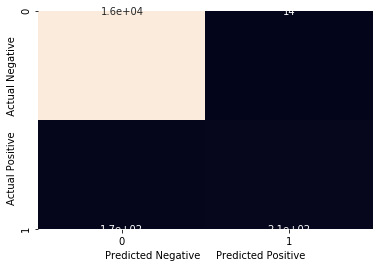

In [47]:
mat4 = confusion_matrix(y_test,y_test_predict_b.round())
print(mat4)

sns.heatmap(mat4, annot=True, cbar= False)
plt.xlabel("Predicted Negative     Predicted Positive")
plt.ylabel("Actual Positive     Actual Negative")
print('Confusion matrix for balanced testing data: ')

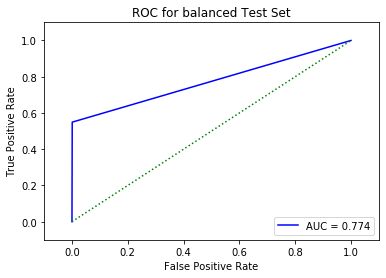

Misclassification rate for balanced test set:  0.01144


In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_b)
roc_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, color='blue', label='AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='green',  linestyle=':')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for balanced Test Set')
plt.show()

mis_class_rate_test = 1 - accuracy_score(y_test, y_test_predict_b)
print('Misclassification rate for balanced test set: ', round(mis_class_rate_test,5))

In [49]:
oob_err = 1- rfc_b.oob_score_
test_err = 1 - rfc_b.score(X_test, y_test)
print('OOB error for balanced random forest:', round(oob_err,5), 'test error: ', round(test_err,5))

OOB error for balanced random forest: 0.0079 test error:  0.01144


## Training sets are with same misclassification rate of 0.0 in two cases. The misclassification rate on test set was 0.00794 for uncompensated case and 0.01144 for balanced case, OOB error was 0.00603 for uncompensated case and 0.0079 for balanced case. Misclassification rate on test set and OOB error for the uncompensated case is a little bit better than the balanced case. 

<font size =5 >(e) Model Trees

<font size =5 >(f) Use SMOTE

## See pdf for following 2 questions
4. ISLR, 6.8.5
5. ISLR 8.4.5

<font size = 5> 3. ISLR 6.8.3

<font size = 5>(a)As we increase s from 0, the training RSS will steadily decrease. As we increase s
 from 0, we are restricting the βj coefficients less and less, and the coefficients will increase to their least squares estimates, so the model is becoming more and more flexible leads to a steady decrease in the training RSS.

<font size = 5>(b)Repeat (a) for test RSS: Decrease initially, and then eventually start increasing in a U shape. As we increase s from 0 the βj coefficients would get restricted to less and less, the coefficients will increase to their least squares estimates, and so the model is becoming more and more flexible which provokes at first a decrease in the test RSS before increasing again after that in a typical U shape.

<font size = 5>(c)Repeat (a) for variance: Steadily increase. As we increase s from 0, we are restricting the βj coefficients less and less, the coefficients will increase to their least squares estimates, and so the model is becoming more and more flexible which leads to a steady increase in variance.

<font size = 5>(d)Repeat (a) for (squared) bias: It will steadily decrease. As we increase s from 0, we are restricting the βj coefficients less and less, the coefficients will increase to their least squares estimates, so the model is becoming more and more flexible which leads to a steady decrease in bias.

<font size = 5>(e)Repeat (a) for the irreducible error: It will Remain constant, because the irreducible error is always constant.

<font size = 5> 6. ISLR 9.7.3 (a)

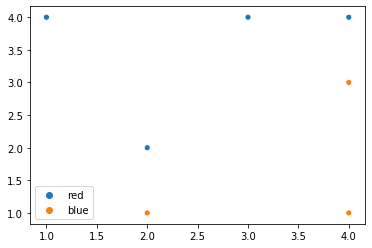

In [50]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']

sns.scatterplot(x1, x2, hue = y)

<font size = 5> (b) -(0.5) + x1 - x2 = 0

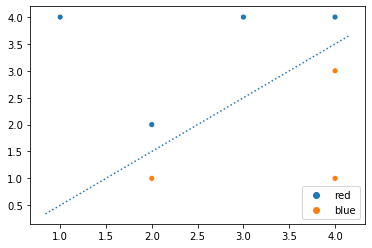

In [51]:
colors = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']
sns.scatterplot(x1, x2, hue = colors)
pltgca=plt.gca()
x_v = np.array(pltgca.get_xlim())
y_v = -(0.5) +1*x_v
plt.plot(x_v,y_v,':')

<font size = 5> (c) β0= -0.5, β1 = 1, and β2 = 1 

<font size = 5> (d)

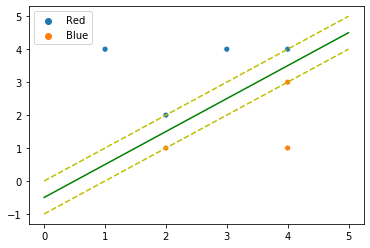

In [52]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5

mg_upper = X1
mg_lower = X1 -1


ax = sns.scatterplot(x1, x2, hue = y)
ax.plot(X1, X2, color='g')
ax.plot(X1, mg_upper, linestyle='--', color='y')
ax.plot(X1, mg_lower, linestyle='--', color='y')

 <font size=5> (e) SV are observations lie on the yellow margins

 <font size=5> (f)

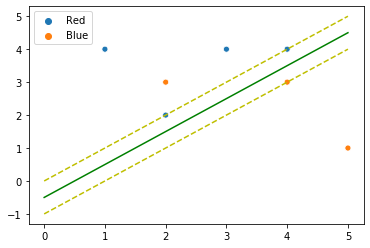

In [53]:
x1 = [3, 2, 4, 1, 2, 4, 5]
x2 = [4, 2, 4, 4, 3, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5

mg_upper = X1
mg_lower = X1 -1


ax = sns.scatterplot(x1, x2, hue = y)
ax.plot(X1, X2, color='g')
ax.plot(X1, mg_upper, linestyle='--', color='y')
ax.plot(X1, mg_lower, linestyle='--', color='y')

## Move 7th observation x += 1, the hyperplane has not changed

<font size=5>(g) Sketch a hyperplane that is not the optimal separating hyper- plane, and provide the equation for this hyperplane.

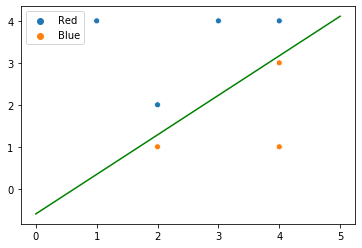

In [54]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

X1 = np.linspace(0, 5, 10)
X2 = 0.942 *X1 - 0.6

mg_upper = X1
mg_lower = X1 -1


ax = sns.scatterplot(x1, x2, hue = y)
ax.plot(X1, X2, color='g')


## Equation:  0.942*x1  - 0.6  - x2

<font size = 5> (h)Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.


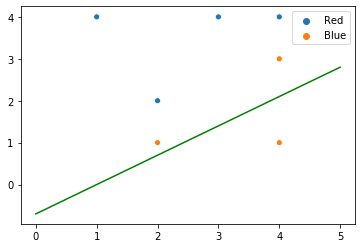

In [55]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

X1 = np.linspace(0, 5, 10)
X2 =  0.7*X1 - 0.7

mg_upper = X1
mg_lower = X1 -1


ax = sns.scatterplot(x1, x2, hue = y)
ax.plot(X1, X2, color='g')
